# Chiziqli (Linear) Regressiya: Bosqichma-bosqich Qo'llanma
Ushbu Jupyter daftari **chiziqli regressiya**ni qanday amalga oshirishni, ma'lumotlar to'plamini tahlil qilish va bashorat qilish uchun qanday ishlatilishini ko'rsatadi.

In [4]:
# Zarur kutubxonalarni import qilish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

## 1-bosqich: Ma'lumotlar to'plamini yuklash
Biz uylarning o'lchamlari va narxlari haqida kichik bir ma'lumotlar to'plamini yaratamiz.

In [31]:
# Ma'lumotlarni yaratish
ma_data = {
    "Uy hajmi (kvadrat fut)": [850, 900, 1200, 1500, 1800],
    "Uy narxi (USD)": [250000, 260000, 300000, 370000, 400000]
}
df = pd.DataFrame(ma_data)

# Ma'lumotlar jadvalini ko'rsatish
# df

In [34]:
b = 115000
w = 160
X = df['Uy hajmi (kvadrat fut)']
y = b + w * X

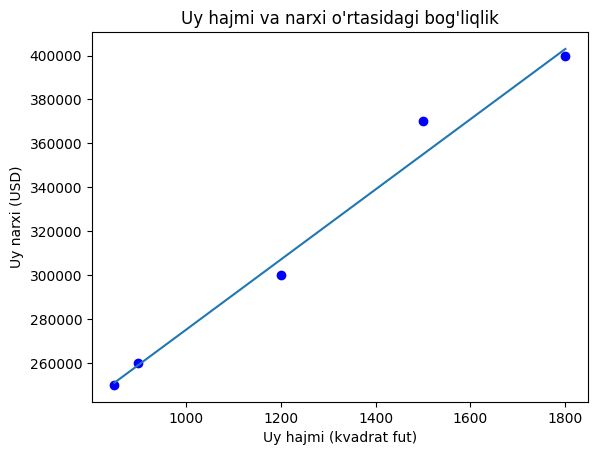

In [35]:
# Scatter grafik
plt.scatter(df["Uy hajmi (kvadrat fut)"], df["Uy narxi (USD)"], color="blue")
plt.plot(X, y)
plt.title("Uy hajmi va narxi o'rtasidagi bog'liqlik")
plt.xlabel("Uy hajmi (kvadrat fut)")
plt.ylabel("Uy narxi (USD)")
plt.show()

## 2-bosqich: Ma'lumotlarni vizuallashtirish
Uy hajmi va narxi o'rtasidagi bog'liqlikni tushunish uchun scatter grafik yasaymiz.

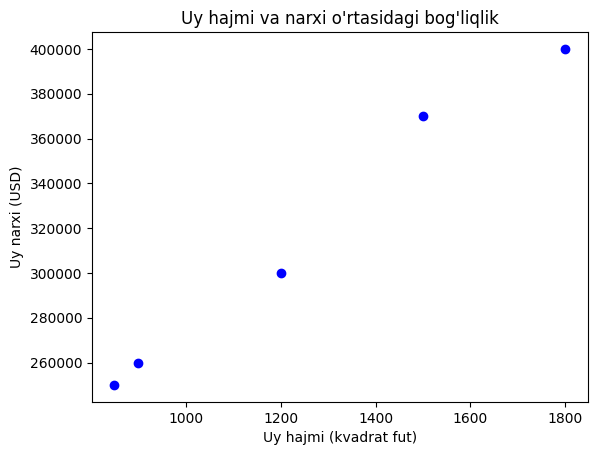

In [6]:
# Scatter grafik
plt.scatter(df["Uy hajmi (kvadrat fut)"], df["Uy narxi (USD)"], color="blue")
plt.title("Uy hajmi va narxi o'rtasidagi bog'liqlik")
plt.xlabel("Uy hajmi (kvadrat fut)")
plt.ylabel("Uy narxi (USD)")
plt.show()

## 3-bosqich: Ma'lumotlarni bo'lish
Ma'lumotlar to'plamini o'rgatish (train) va test qilish (test) uchun ikkiga bo'lamiz.

In [7]:
# Xususiyatlar (X) va nishon (y)ni aniqlash
X = df[["Uy hajmi (kvadrat fut)"]]
y = df["Uy narxi (USD)"]

# O'rgatish va test to'plamlariga bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# O'rgatish va test ma'lumotlarini ko'rsatish
X_train, X_test

(   Uy hajmi (kvadrat fut)
 4                    1800
 2                    1200
 0                     850
 3                    1500,
    Uy hajmi (kvadrat fut)
 1                     900)

## 4-bosqich: Modelni o'rgatish (training)
Chiziqli regressiya modelini o'rgatish uchun `LinearRegression` sinfidan foydalanamiz.

In [8]:
# Modelni ishga tushirish
model = LinearRegression()

# Modelni o'rgatish
model.fit(X_train, y_train)

# Koeffitsientlarni chiqarish
print("Intercept (Beta_0):", model.intercept_)
print("Slope (Beta_1):", model.coef_[0])

Intercept (Beta_0): 109270.4402515724
Slope (Beta_1): 165.03144654088044


## 5-bosqich: Bashorat qilish
O'rgatilgan model yordamida test to'plamidagi uy narxlarini bashorat qilamiz.

In [9]:
# Test to'plamida narxlarni bashorat qilish
y_pred = model.predict(X_test)

# Natijalarni ko'rsatish
natijalar = pd.DataFrame({"Haqiqiy": y_test.values, "Bashorat qilingan": y_pred})
natijalar

,Haqiqiy,Bashorat qilingan
0,260000,257798.742138


## 6-bosqich: Modelni baholash
Modelning ishlashini baholash uchun **O'rtacha kvadratik xato** (MSE) va **R-kvadrat** (R^2) kabi baholash metrikalaridan foydalanamiz.

In [10]:
# O'rtacha kvadratik xato (MSE) va R-kvadratni hisoblash
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("O'rtacha kvadratik xato (MSE):", mse)
print("R-kvadrat (R^2):", r2)

O'rtacha kvadratik xato (MSE): 4845536.173410823
R-kvadrat (R^2): nan


C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## 7-bosqich: Regressiya chizig'ini vizuallashtirish
O'rgatish va test ma'lumotlari bilan birga regressiya chizig'ini grafikda ko'rsatamiz.

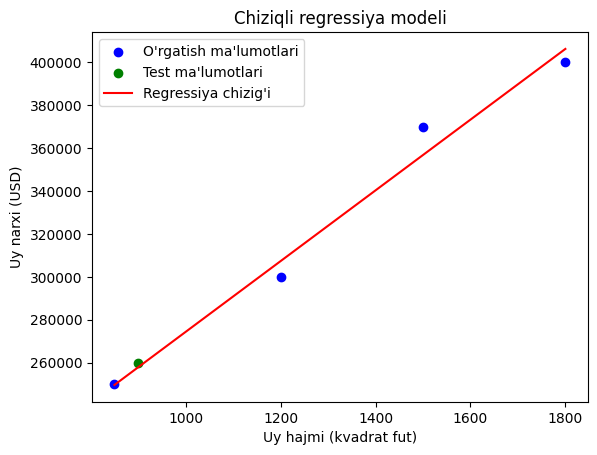

In [11]:
# O'rgatish ma'lumotlari va regressiya chizig'i grafikasi
plt.scatter(X_train, y_train, color="blue", label="O'rgatish ma'lumotlari")
plt.scatter(X_test, y_test, color="green", label="Test ma'lumotlari")
plt.plot(X, model.predict(X), color="red", label="Regressiya chizig'i")
plt.title("Chiziqli regressiya modeli")
plt.xlabel("Uy hajmi (kvadrat fut)")
plt.ylabel("Uy narxi (USD)")
plt.legend()
plt.show()